In [ ]:
'''
Inferential statistics:
It gives us to make conclusions about a population based on a sample of data.
This module provides functions to perform inferential statistics, including hypothesis testing and confidence intervals.
It includes functions for t-tests, z-tests, chi-squared tests, and confidence intervals for means and proportions.
It is designed to be used in conjunction with the `statistics` module for descriptive statistics.
'''

In [ ]:
'''
Hypothesis Testing:
Definition:
    Hypothesis testing is a statistical method used to make inferences about a population based on a sample. 
    It involves formulating a null hypothesis (H0) and an alternative hypothesis (H1), 
    then using sample data to determine whether to reject or fail to reject the null hypothesis.
Hypothesis Testing Mechanism:
    1. Formulate the null hypothesis (H0) and alternative hypothesis (H1).
    (Here null hypothesis is a statement of no effect or no difference, 
    while the alternative hypothesis is what you want to prove.)
    2. Choose a significance level (alpha), typically 0.05, (Confidence Interval (CI)= 1-alpha).
    3. Collect sample data and calculate the test statistic.
    4. Determine the critical value or p-value based on the test statistic.
    5. Compare the test statistic to the critical value or p-value to make a decision.
    6. Draw conclusions about the population based on the results.

Example:
    Suppose we want to test whether a new drug is effective in reducing blood pressure.
    - Null Hypothesis (H0): The drug has no effect on blood pressure.
    - Alternative Hypothesis (H1): The drug reduces blood pressure.
    - We collect sample data, calculate the test statistic, and compare it to the critical value or p-value.
    - If the test statistic exceeds the critical value or the p-value is less than alpha, we reject H0 and conclude that the drug is effective.
'''

In [ ]:
'''
p-value:
Definition:
    The p-value is the probability of observing a test statistic at least as extreme as the one calculated from the sample data, 
    assuming that the null hypothesis is true. It quantifies the evidence against the null hypothesis.
Mechanism:
    1. Calculate the test statistic from the sample data.
    2. Determine the distribution of the test statistic under the null hypothesis.
    3. Calculate the p-value as the probability of observing a test statistic as extreme or more extreme than the one calculated.
    4. Compare the p-value to the significance level (alpha) to make a decision about the null hypothesis.
Formula:
    p-value = P(T >= t | H0) for a right-tailed test
    p-value = P(T <= t | H0) for a left-tailed test
    p-value = 2 * min(P(T >= t | H0), P(T <= t | H0)) for a two-tailed test
Example:
    Suppose we have a school with students who take a math test.
    - Null Hypothesis (H0): The average score of students is 75.
    - We collect sample data and calculate the test statistic.
    - If we find a p-value of 0.03, it means there is a 3% chance of observing a test statistic as extreme as ours if the null hypothesis is true.
    - If our significance level (alpha) is 0.05, we reject the null hypothesis because 0.03 < 0.05, indicating that the average score is significantly different from 75.

'''

In [2]:
# implement the above example in code p-test
import numpy as np
from scipy import stats
def test_math_scores(scores, null_hypothesis_mean=75, alpha=0.05):
    """
    Perform a one-sample t-test to determine if the average score of students is significantly different from the null hypothesis mean.
    
    Parameters:
    scores (list or np.array): Sample data of student scores.
    null_hypothesis_mean (float): The mean score under the null hypothesis.
    alpha (float): Significance level for the test.
    
    Returns:
    dict: Results of the hypothesis test including test statistic, p-value, and conclusion.
    """
    # Calculate the sample mean and standard deviation
    sample_mean = np.mean(scores)
    sample_std = np.std(scores, ddof=1)  # Sample standard deviation
    n = len(scores)  # Sample size
    
    # Perform the t-test
    t_statistic, p_value = stats.ttest_1samp(scores, null_hypothesis_mean)
    
    # Determine if we reject or fail to reject the null hypothesis
    if p_value < alpha:
        conclusion = "Reject the null hypothesis: The average score is significantly different from 75."
    else:
        conclusion = "Fail to reject the null hypothesis: The average score is not significantly different from 75."
    
    return {
        'sample_mean': sample_mean,
        'sample_std': sample_std,
        't_statistic': t_statistic,
        'p_value': p_value,
        'conclusion': conclusion
    }
# Example usage
scores = [78, 75, 74, 75, 75, 76, 75, 78, 73, 74]
result = test_math_scores(scores)
print("Sample Mean:", result['sample_mean'])
print("Sample Standard Deviation:", result['sample_std'])
print("T-Statistic:", result['t_statistic'])
print("P-Value:", result['p_value'])
print("Conclusion:", result['conclusion'])


Sample Mean: 75.3
Sample Standard Deviation: 1.636391694484477
T-Statistic: 0.5797409637607422
P-Value: 0.5763121535388385
Conclusion: Fail to reject the null hypothesis: The average score is not significantly different from 75.


In [ ]:
'''
Different types of hypothesis tests:
1. One-sample t-test:
    - Used to compare the mean of a single sample to a known value (e.g., population mean).
    - Assumes the sample is drawn from a normally distributed population.
    - Example: Testing if the average height of a group of people is significantly different from 170 cm.
2. Two-sample t-test:
    - Used to compare the means of two independent samples.
    - Assumes both samples are drawn from normally distributed populations with equal variances.
    - Example: Testing if the average test scores of students in two different classes are significantly different.
3. Paired t-test:
    - Used to compare the means of two related samples (e.g., before and after measurements).
    - Assumes the differences between paired observations are normally distributed.
    - Example: Testing if a training program significantly improves test scores by comparing scores before and after the program.
4. Z-test:
    - Used to compare the mean of a sample to a known population mean when the population standard deviation is known.
    - Assumes the sample size is large (n > 30) or the population is normally distributed.
    - Example: Testing if the average weight of a sample of apples is significantly different from the known average weight of apples in the market.
5. Chi-squared test:
    - Used to test the association between categorical variables.
    - Compares observed frequencies in categories to expected frequencies under the null hypothesis.
    - Example: Testing if there is a significant association between gender and voting preference.
6. ANOVA (Analysis of Variance):
    - Used to compare means across three or more groups.
    - Assumes the groups are independent and normally distributed with equal variances.
    - Example: Testing if the average test scores of students from different schools are significantly different.
Note:
    - t-test and z-test are used for comparing means (or averages), while chi-squared test is used for categorical data.
    - ANOVA is an extension of the t-test for multiple groups, and used for variance analysis.
    - in z-table, we use z-score and p-value to determine the significance of the results.
    - in t-table, we use t-score and p-value to determine the significance of the results.
    - difference in z-test and t-test :
        z-test is used when the population standard deviation is known and sample size (n) is >= 30,
        while t-test is used when the population standard deviation is unknown and the sample size is < 30.
'''

In [ ]:
'''
Z-test:
definition:
    A z-test is a statistical test used to determine whether there is a significant difference between the 
    means of two groups or between a sample mean and a population mean when the population standard deviation is known.

Assumptions:
    1. The data is normally distributed or the sample size is large (n >= 30).
    2. The population standard deviation is known.
    3. The samples are independent.

Critical Region:
    - The critical region is the area in the tails of the normal distribution where the null hypothesis is rejected.
    - For a two-tailed test, the critical region is split between both tails, while for a one-tailed test, it is in one tail only.
    - The significance level (alpha) determines the size of the critical region, typically set at 0.05 or 0.01.

Types of Z-tests:
    1. Tow-tailed Z-test:
        - Used to determine if there is a significant difference between the means of two groups in either direction.
        - Null Hypothesis (H0): The means are equal.
        - Alternative Hypothesis (H1): The means are not equal.
        - Critical Region: The critical region is in both tails of the normal distribution. 
            If alpha = 0.05, the critical z-values are approximately -1.96 and +1.96.
    2. One-tailed Z-test:
        - Used to determine if there is a significant difference in one specific direction (greater than or less than).
        - Null Hypothesis (H0): The mean is equal to a specific value.
        - Alternative Hypothesis (H1): The mean is greater than or less than that specific value.
        - Critical Region: The critical region is in one tail of the normal distribution. 
            If alpha = 0.05 for a right-tailed test, the critical z-value is approximately +1.645; 
            for a left-tailed test, it is approximately -1.645.
    3. Z-test for proportions:
        - Used to compare the proportion of successes in a sample to a known population proportion.
        - Null Hypothesis (H0): The sample proportion is equal to the population proportion.
        - Alternative Hypothesis (H1): The sample proportion is not equal to the population proportion.

When to use which type of Z-test:
    - Use a two-tailed Z-test when you want to test for any significant difference between two means.
    - Use a one-tailed Z-test when you have a specific direction in mind (greater than or less than).
        - Greater than when right-tailed, less than when left-tailed.
    - Use a Z-test for proportions when comparing sample proportions to known population proportions.
'''

#### Formula to calculate z-value
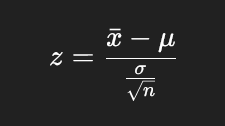
- xˉ = sample mean
- μ = population mean
- σ = population standard deviation 
- n = sample size

Z-Statistic: 2.31
Critical Z-Value for alpha=0.05: ±1.96


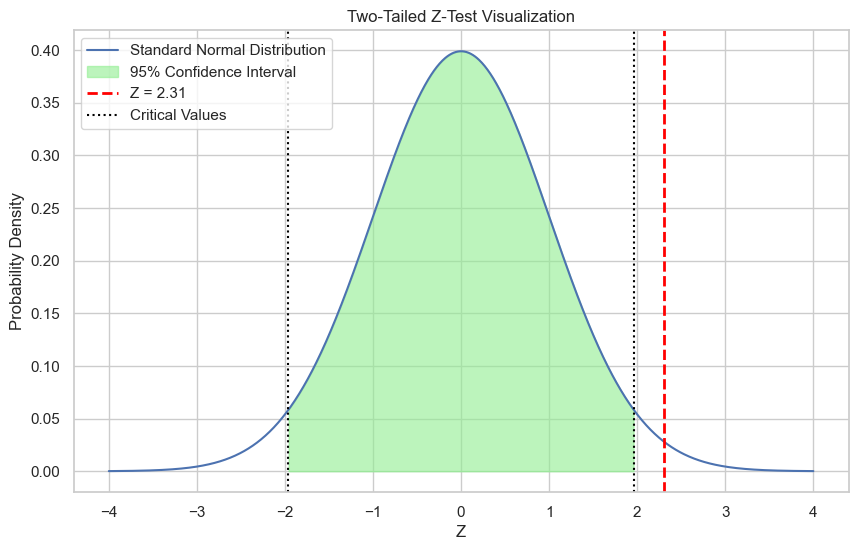

Reject the null hypothesis: The sample mean is significantly different from the population mean.


In [ ]:

# 2- tailed Z-test example
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Inputs
sample_mean = 169.5
population_mean = 168
population_std = 3.9
sample_size = 36
alpha = 0.05

# Calculate z-statistic
z_stat = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
print(f"Z-Statistic: {z_stat:.2f}")

# Create the x-axis for standard normal distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)

# Critical z-values for two-tailed test
z_critical = norm.ppf(1 - alpha/2)
print(f"Critical Z-Value for alpha={alpha}: ±{z_critical:.2f}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Standard Normal Distribution')

# Fill confidence interval
plt.fill_between(x, y, where=(x >= -z_critical) & (x <= z_critical), color='lightgreen', alpha=0.6, label='95% Confidence Interval')

# Mark z-statistic
plt.axvline(z_stat, color='red', linestyle='--', linewidth=2, label=f'Z = {z_stat:.2f}')
plt.axvline(-z_critical, color='black', linestyle=':', label='Critical Values')
plt.axvline(z_critical, color='black', linestyle=':')

# Labels
plt.title('Two-Tailed Z-Test Visualization')
plt.xlabel('Z')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# Conclusion
if abs(z_stat) > z_critical:
    conclusion = "Reject the null hypothesis: The sample mean is significantly different from the population mean."
else:
    conclusion = "Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean."
print(conclusion)


Z-Statistic: 2.31
P-Value: 0.0210
Critical Z-Value for alpha=0.05: ±1.96


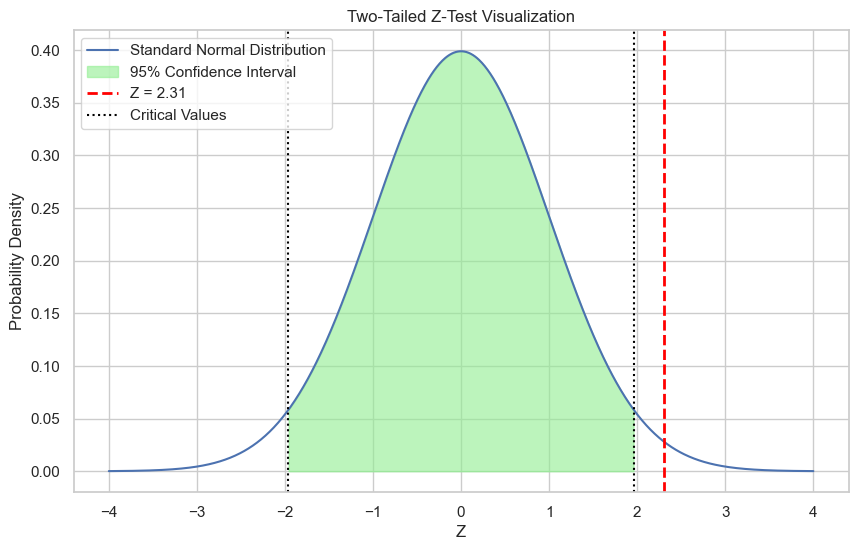

Reject the null hypothesis: The sample mean is significantly different from the population mean.
Final conclusion sample mean not equal to 168(population mean).


In [27]:
# p- test for above example
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

sample_mean = 169.5
population_mean = 168
population_std = 3.9
sample_size = 36
alpha = 0.05

# Calculate z-statistic
z_stat = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
print(f"Z-Statistic: {z_stat:.2f}")

# Calculate p-value (two-tailed)
p_value = 2 * (1 - norm.cdf(abs(z_stat)))
print(f"P-Value: {p_value:.4f}")

# Create the x-axis for standard normal distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)

# Critical z-values for two-tailed test
z_critical = norm.ppf(1 - alpha/2)
print(f"Critical Z-Value for alpha={alpha}: ±{z_critical:.2f}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Standard Normal Distribution')

# Fill confidence interval
plt.fill_between(x, y, where=(x >= -z_critical) & (x <= z_critical), color='lightgreen', alpha=0.6, label='95% Confidence Interval')

# Mark z-statistic
plt.axvline(z_stat, color='red', linestyle='--', linewidth=2, label=f'Z = {z_stat:.2f}')
plt.axvline(-z_critical, color='black', linestyle=':', label='Critical Values')
plt.axvline(z_critical, color='black', linestyle=':')

# Labels
plt.title('Two-Tailed Z-Test Visualization')
plt.xlabel('Z')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# Conclusion
if p_value < alpha:
    conclusion = "Reject the null hypothesis: The sample mean is significantly different from the population mean."
    result = "Final conclusion sample mean not equal to 168(population mean)." 
else:
    conclusion = "Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean."
    result = "Final conclusion sample mean equal to 168(population mean)."
print(conclusion+"\n"+result)


In [ ]:
'''
Example scenario (one-tailed z-test):
A factory manufactures light bulbs with an average warranty of 5 years with a standard deviation of 0.50.
A worker believes that the bulb will malfunction in less than 5 years.
He tests a sample of 40 bulbs and finds that the average lifetime is 4.8 years.
So now, 
q1. state the null and alternative hypothesis?
H0: The average lifetime of the bulbs is equal to 5 years.
H1: The average lifetime of the bulbs is less than 5 years.

q2. at a 2% significance level, is there enough evidence to support the idea that warranty should be revised?
Answer:
To determine if there is enough evidence to support the idea that the warranty should be revised, we can perform a one-tailed z-test.
We will calculate the z-statistic and compare it to the critical z-value for a one-tailed test at a 2% significance level.


'''

In [38]:

#so provided details are:
sample_mean = 4.8
population_mean = 5
population_std = 0.50
sample_size = 40
alpha = 0.02
# Calculate z-statistic
z_stat = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
print(f"Z-Statistic: {z_stat:.2f}")

# Critical z-value for one-tailed test (left-tailed)
z_critical = norm.ppf(alpha)
print(f"Critical Z-Value for alpha={alpha}: {z_critical:.2f}")

# p-value calculation
# Since this is a left-tailed test, we calculate the p-value as the cumulative distribution function (CDF) of the z-statistic
p_value = norm.cdf(z_stat)
print(f"P-Value: {p_value:.4f}")


# Conclusion
if z_stat < z_critical:
    conclusion = "Reject the null hypothesis: There is enough evidence to support the idea that the warranty should be revised."
else:
    conclusion = "Fail to reject the null hypothesis: There is not enough evidence to support the idea that the warranty should be revised."
print("z-value conclusion:", conclusion)

if p_value < alpha:
    p_conclusion = "Reject the null hypothesis: There is enough evidence to support the idea that the warranty should be revised."
else:
    p_conclusion = "Fail to reject the null hypothesis: There is not enough evidence to support the idea that the warranty should be revised."
print("p-value conclusion", p_conclusion)
print("So this was a one-tailed z-test (directional test) because we were testing if the average lifetime is less than 5 years.")
print("direction of test was left-tailed because we were testing if the average lifetime is less than 5 years.")


Z-Statistic: -2.53
Critical Z-Value for alpha=0.02: -2.05
P-Value: 0.0057
z-value conclusion: Reject the null hypothesis: There is enough evidence to support the idea that the warranty should be revised.
p-value conclusion Reject the null hypothesis: There is enough evidence to support the idea that the warranty should be revised.
So this was a one-tailed z-test (directional test) because we were testing if the average lifetime is less than 5 years.
direction of test was left-tailed because we were testing if the average lifetime is less than 5 years.
